# Encoding Categorical Variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# Load the Dataset
df = pd.read_csv("../results/outputs/missing_data_handled_telco_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.drop('customerID', axis=1, inplace=True)

In [3]:
# Separate categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [4]:
# Label encoding for binary variables
binary_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'PaperlessBilling', 'Churn'
]

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [5]:
# Ordinal Encoding
contract_order = [['Month-to-month', 'One year', 'Two year']]
encoder = OrdinalEncoder(categories=contract_order)
df['Contract'] = encoder.fit_transform(df[['Contract']])

In [6]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['InternetService','PaymentMethod','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'])

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,1,0,0.0,1,29.85,29.85,...,False,True,False,False,True,False,False,True,False,False
1,1,0,0,0,34,1,1.0,0,56.95,1889.50,...,True,True,False,False,True,False,False,True,False,False
2,1,0,0,0,2,1,0.0,1,53.85,108.15,...,False,True,False,False,True,False,False,True,False,False
3,1,0,0,0,45,0,1.0,0,42.30,1840.75,...,True,False,False,True,True,False,False,True,False,False
4,0,0,0,0,2,1,0.0,1,70.70,151.65,...,False,True,False,False,True,False,False,True,False,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   Contract                                 7043 non-null   float64
 7   PaperlessBilling                         7043 non-null   int64  
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7043 non-null   float64
 10  Churn                                    7043 no

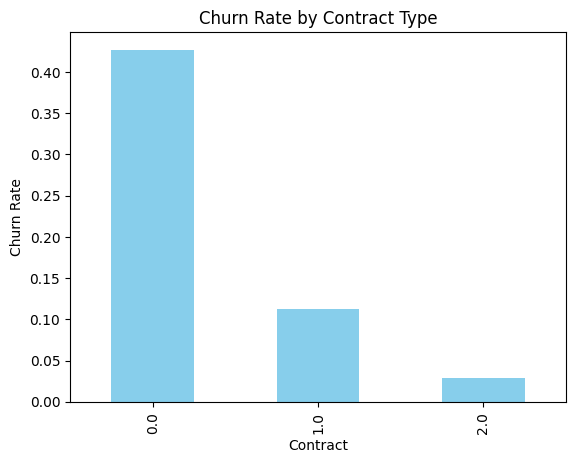

In [9]:
# Churn rate by Contract type
churn_by_contract = df.groupby('Contract')['Churn'].mean()

churn_by_contract.plot(kind='bar', color='skyblue')
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.show()

In [10]:
df.to_csv('../results/outputs/encoded_telco_data.csv', index=False)